### INTRODUCTION TO ARTIFICIAL INTELLIGENCE MID SEMESTER EXAMS.

### TOPIC: PREDICTING CUSTOMER CHURN FOR A TELECOM COMPANY.

### GROUP TWO (2) MEMBERS' NAMES AND ROLL NUMBERS:
#### 1. BEREVLYN SAWYERR-MARKWEI: 10201100095.
#### 2. DELASIE KWADJO BANSAH: 10201100123.
#### 3. MOHAMMED COULIBALY: 10201100157.




### TASK 1: DATA PREPROCESSING.

#### IMPORT LIBRARIES.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pickle  # for loading model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer




#### a. Import the dataset.

In [2]:
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Display the first few rows of the dataframe.
print("First few rows of the dataset:")
print(churn_data.head())

First few rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0  No phone service             DSL             No  ...               No  \
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

In [4]:
#Checking data info.
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### b. Conduct preliminary data exploration.

In [5]:
# Data exploration.
print("\nData exploration:")
print("Dataset shape:", churn_data.shape)
print("\nData types:")
print(churn_data.dtypes)


Data exploration:
Dataset shape: (7043, 21)

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
# Summary statistics.
print("\nSummary statistics:")
print(churn_data.describe())


Summary statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


#### c.  Clean the data by handling missing values, outliers, and any erroneous data entries.

In [7]:
# Checking for missing values.
print("\nMissing values:")
print(churn_data.isnull().sum())


Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Drop unnecessary columns.
churn_data.drop('customerID', axis=1, inplace=True)

In [9]:
# Replace empty strings with NaN.
churn_data.replace('', np.nan, inplace=True)


In [10]:
# Impute missing values with median for numerical columns
numerical_columns = churn_data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    churn_data[column].fillna(churn_data[column].median(), inplace=True)

In [11]:
# Impute missing values with mode for categorical columns
categorical_columns = churn_data.select_dtypes(include='object').columns
for column in categorical_columns:
    churn_data[column].fillna(churn_data[column].mode()[0], inplace=True)

In [12]:
# Check for any remaining missing values
missing_values = churn_data.isnull().sum()
if missing_values.sum() > 0:
    print("Warning: There are still missing values in the dataset.")
    print(missing_values)

In [13]:
churn_data['TotalCharges'].replace(' ', np.nan, inplace=True)
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

In [14]:
churn_data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# Checking for duplicate rows.
duplicate_rows = churn_data.duplicated()
if duplicate_rows.any():
    print("\nDuplicate rows found! Removing duplicates...")
    churn_data.drop_duplicates(inplace=True)
else:
    print("\nNo duplicate rows found.")


Duplicate rows found! Removing duplicates...


#### d.  Encode categorical variables as necessary for the logistic regression model.

In [16]:
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    churn_data[column] = label_encoders[column].fit_transform(churn_data[column])

### TASK 2: EXPOLRATORY DATA ANALYSIS (EDA).

#### a. Perform an in-depth analysis to understand the dataset's characteristics. ( Univarial analysis )

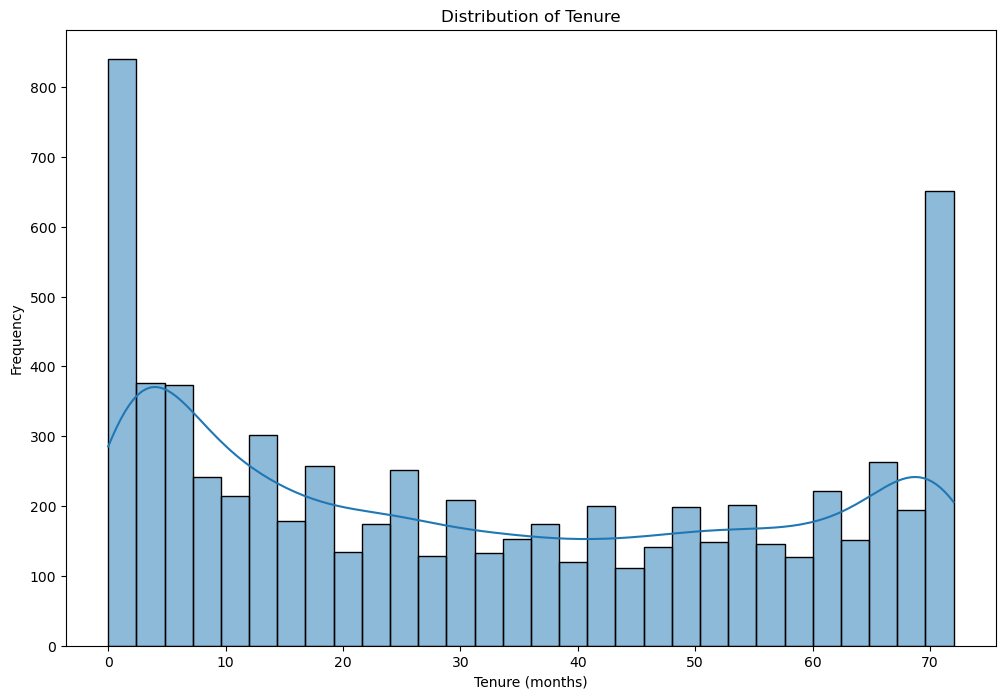

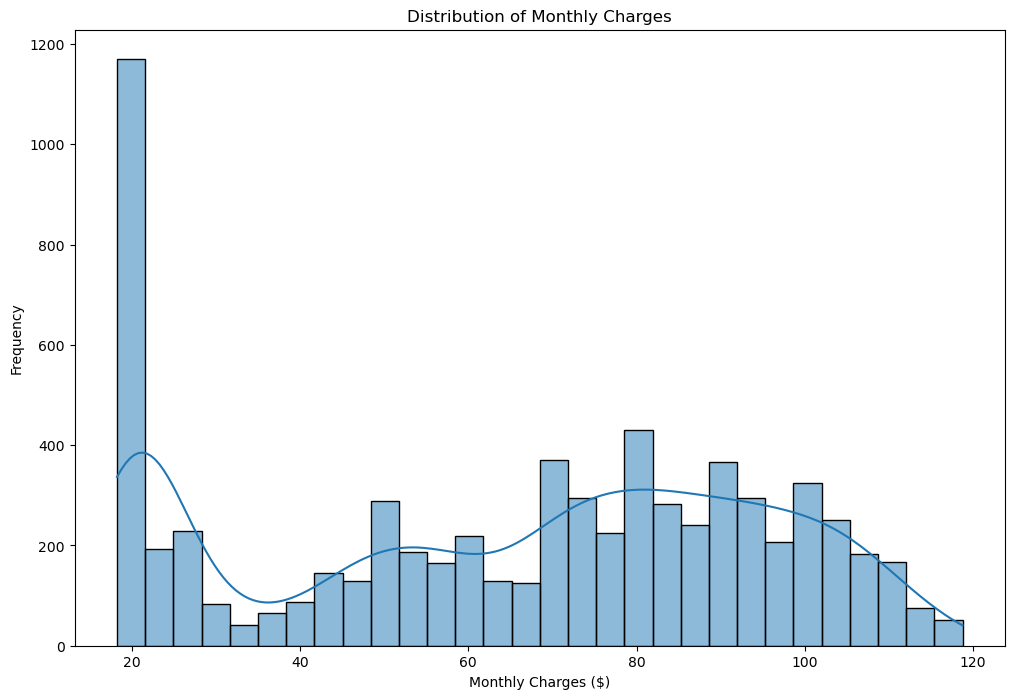

In [17]:
# Distribution of Numerical Variables
plt.figure(figsize=(12, 8))
sns.histplot(data=churn_data, x='tenure', bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=churn_data, x='MonthlyCharges', bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

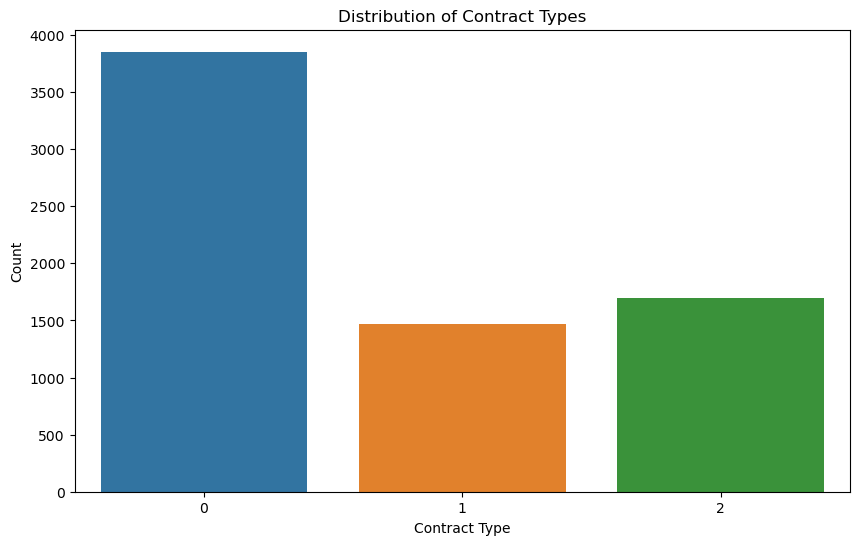

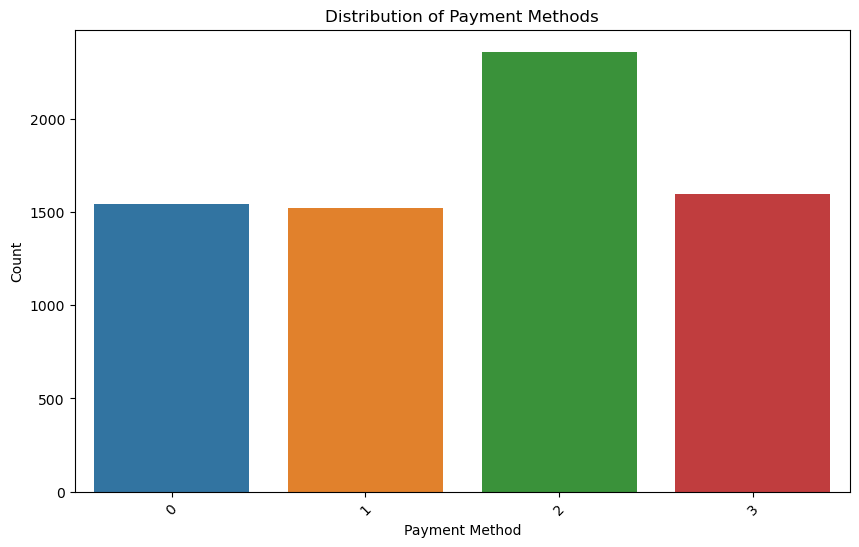

In [18]:
# Distribution of Categorical Variables.
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_data, x='Contract')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=churn_data, x='PaymentMethod')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### b. Visualise the distribution of key variables and their relationship with the churn rate. ( Bivarial analysis )

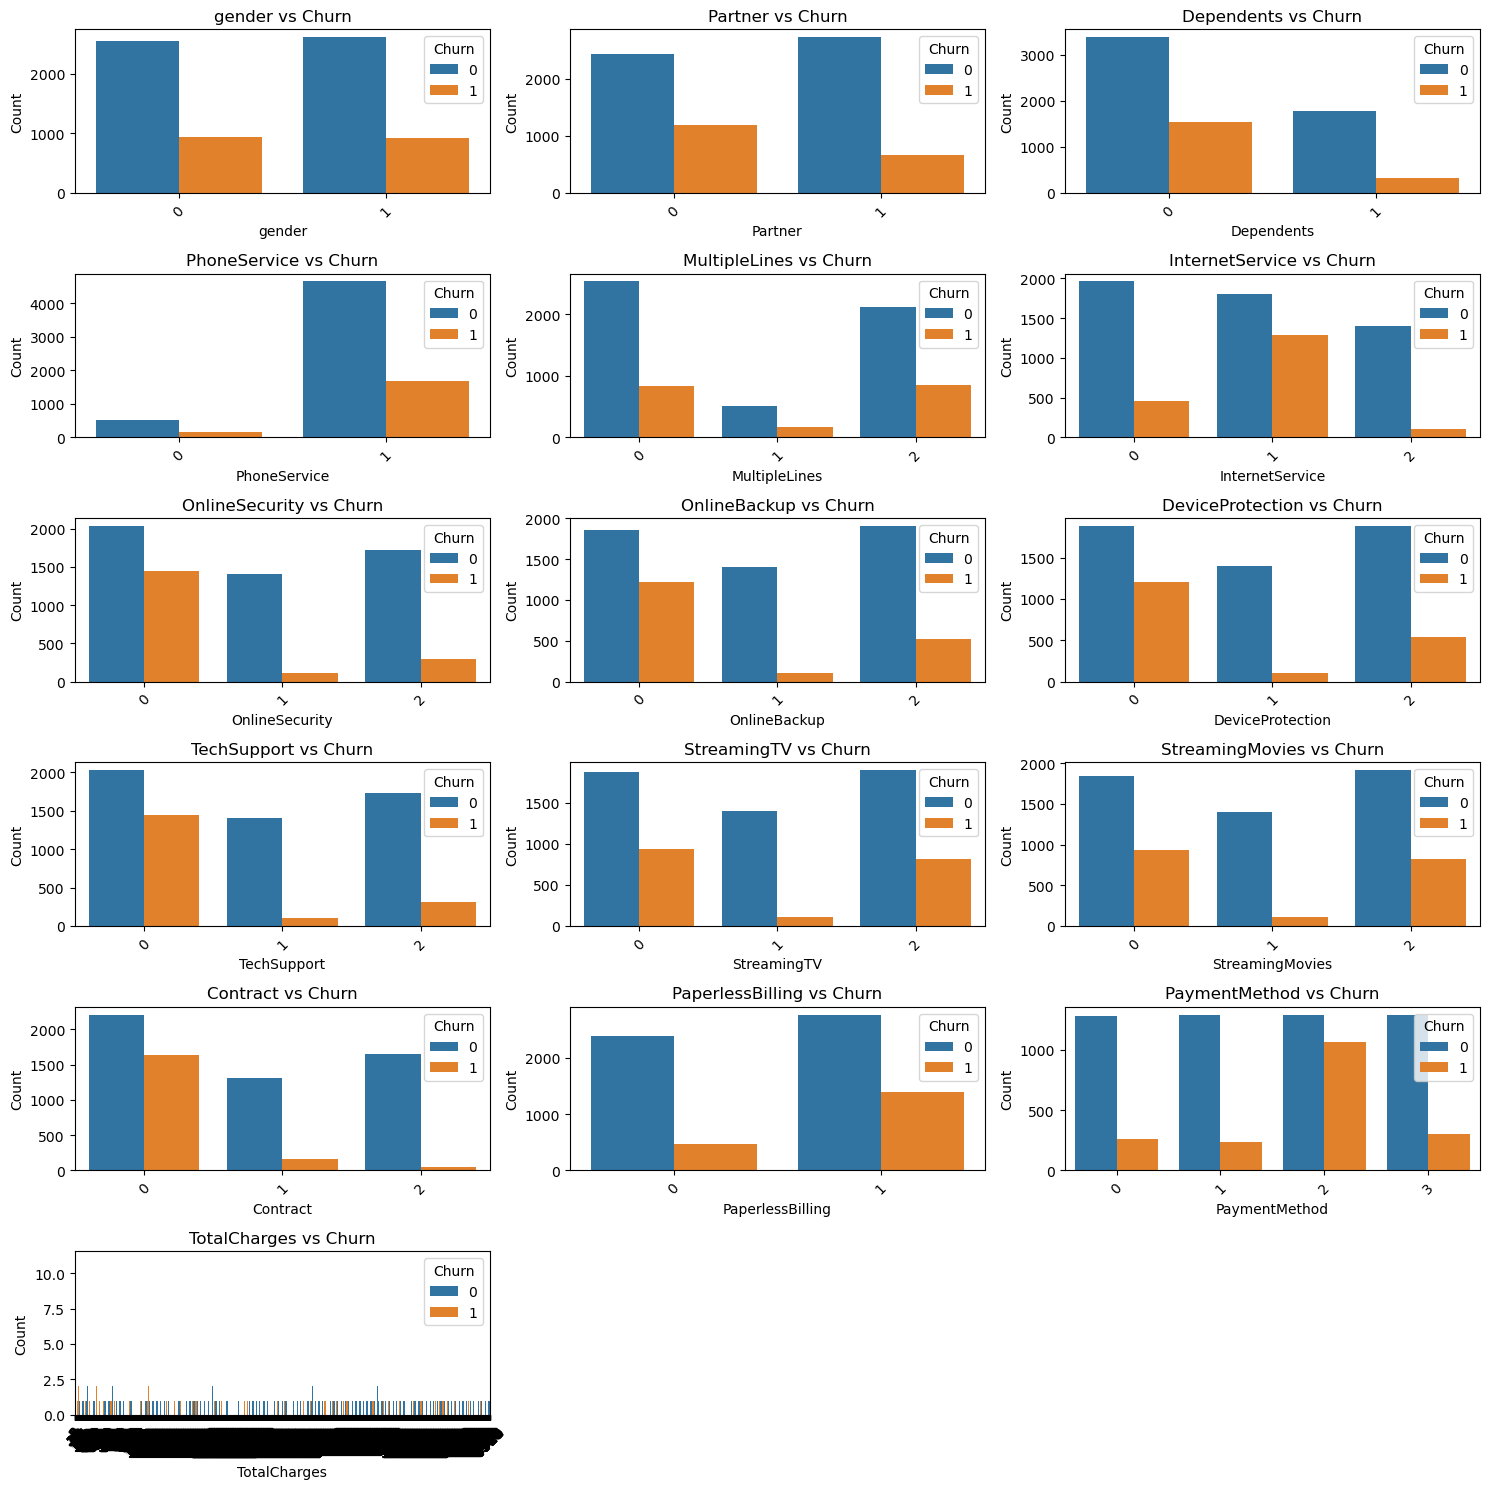

In [19]:
# Visualize the relationship between categorical variables and churn.
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_columns[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=column, hue='Churn', data=churn_data)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### TASK 3: FEATURE SELECTION.

#### a. Utilise statistical tests and decision trees to identify significant predictors of churn.

In [20]:
# Separate features and target variable.
X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

In [21]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Perform chi-square test for categorical variables.
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_train, y_train)


SelectKBest(k='all', score_func=<function chi2 at 0x000001F97F053D30>)

In [23]:
# Get p-values and feature names
chi2_p_values = pd.DataFrame({'Feature': X_train.columns, 'P-value': chi2_selector.pvalues_})


In [24]:
# Display significant predictors (features with low p-values)
print("Significant predictors from chi-square test:")
print(chi2_p_values[chi2_p_values['P-value'] < 0.05])

Significant predictors from chi-square test:
             Feature        P-value
1      SeniorCitizen   1.745672e-26
2            Partner   1.961850e-13
3         Dependents   3.869433e-24
4             tenure   0.000000e+00
6      MultipleLines   1.118400e-04
7    InternetService   1.865738e-03
8     OnlineSecurity  1.504921e-102
9       OnlineBackup   5.085717e-41
10  DeviceProtection   1.726240e-31
11       TechSupport   5.169126e-99
12       StreamingTV   3.978609e-02
14          Contract  1.207369e-189
15  PaperlessBilling   5.102443e-19
16     PaymentMethod   3.070344e-10
17    MonthlyCharges   0.000000e+00
18      TotalCharges   0.000000e+00


In [25]:
# Perform ANOVA for numerical variables
f_selector = SelectKBest(f_classif, k='all')
f_selector.fit(X_train, y_train)

SelectKBest(k='all')

In [26]:
# Get p-values and feature names
f_p_values = pd.DataFrame({'Feature': X_train.columns, 'P-value': f_selector.pvalues_})

In [27]:
# Display significant predictors (features with low p-values)
print("\nSignificant predictors from ANOVA:")
print(f_p_values[f_p_values['P-value'] < 0.05])


Significant predictors from ANOVA:
             Feature        P-value
1      SeniorCitizen   1.004514e-31
2            Partner   7.227092e-25
3         Dependents   2.961863e-34
4             tenure  1.265991e-156
6      MultipleLines   7.318155e-05
7    InternetService   7.781412e-05
8     OnlineSecurity  6.148803e-114
9       OnlineBackup   9.418919e-49
10  DeviceProtection   4.559455e-37
11       TechSupport  7.042114e-110
12       StreamingTV   2.140546e-02
14          Contract  3.851491e-205
15  PaperlessBilling   6.323818e-45
16     PaymentMethod   1.320043e-13
17    MonthlyCharges   7.151651e-51
18      TotalCharges   3.964310e-66


In [28]:
# Feature importance using Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt.feature_importances_})

In [30]:
# Sort features by importance
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

In [31]:
# Display top significant predictors based on feature importance
print("\nSignificant predictors from Decision Tree:")
print(feature_importance.head(10))


Significant predictors from Decision Tree:
            Feature  Importance
18     TotalCharges    0.207254
17   MonthlyCharges    0.201098
14         Contract    0.164833
4            tenure    0.118304
8    OnlineSecurity    0.048938
16    PaymentMethod    0.041787
7   InternetService    0.029864
1     SeniorCitizen    0.026787
0            gender    0.023332
2           Partner    0.022082


#### b. Prepare the final dataset for modelling by selecting relevant features.

In [32]:
# Prepare the final dataset for modeling by selecting relevant features
selected_features = ['Contract', 'tenure', 'MonthlyCharges', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'InternetService', 'TotalCharges', 'StreamingTV']
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

### TASK 4: MODEL BUILDING.

#### a. Split the dataset into training and testing sets.

In [33]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### b. Develop a logistic regression model to predict customer churn.

In [34]:
# Instantiate the logistic regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

In [35]:
# Train the model
logreg_model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [36]:
# Predict on the test set
y_pred = logreg_model.predict(X_test_final)


#### c. Evaluate the model's performance using appropriate metrics (e.g., accuracy, recall, precision, F1 score).

In [37]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [38]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [39]:
# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7893238434163701
Precision: 0.5972222222222222
Recall: 0.48863636363636365
F1 Score: 0.5375000000000001


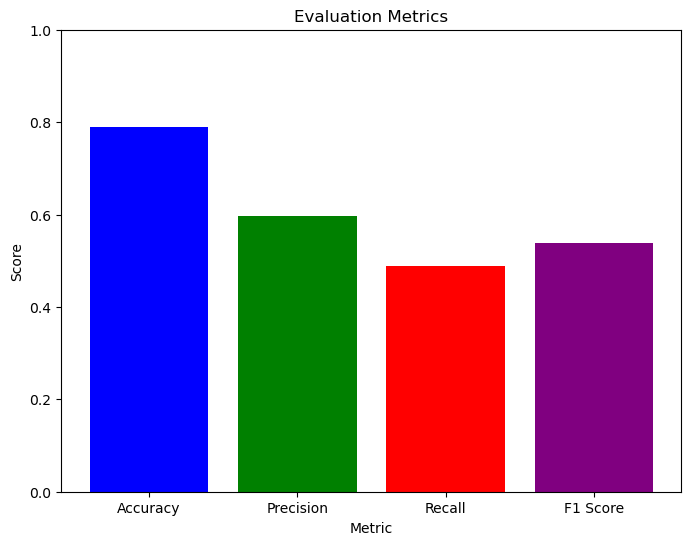

In [40]:
# Plot evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [41]:
# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[937 116]
 [180 172]]


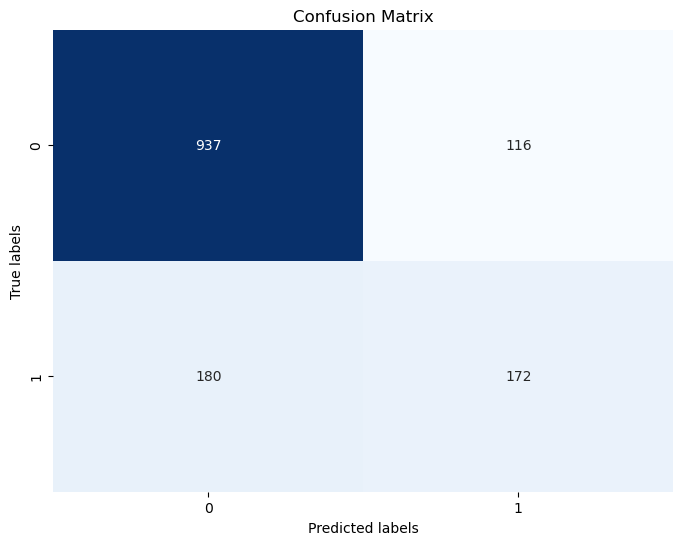

In [42]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### TASK 5: MODEL EVALUATION AND VALIDATION.

#### a. Use the decision tree model as a supplementary approach to identify the primary factors causing churn.

In [43]:
# Train decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
# Get feature importances from decision tree model
dt_feature_importances = dt_classifier.feature_importances_


In [45]:
# Rank Features
feature_importance_indices = dt_feature_importances.argsort()[::-1]
ranked_features_decision_tree = X.columns[feature_importance_indices]

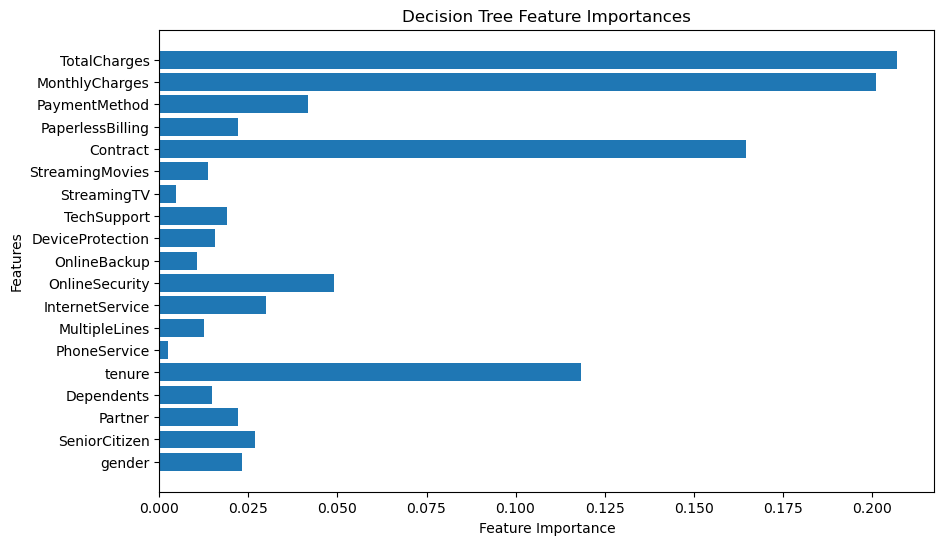

In [46]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, dt_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importances')
plt.show()

#### b. Compare the findings from both models to ensure consistency and reliability in the identified churn drivers.

In [47]:
# Train logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

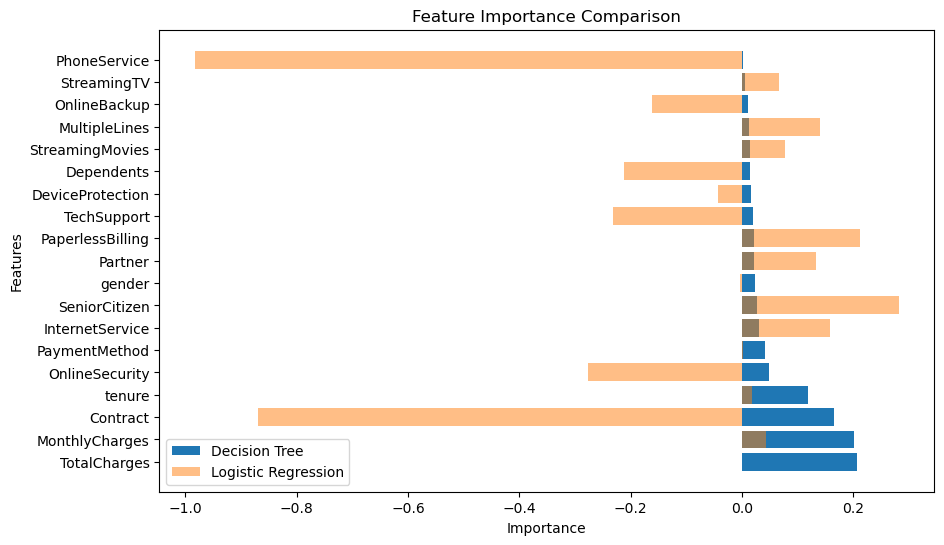

In [48]:
plt.figure(figsize=(10, 6))
plt.barh(ranked_features_decision_tree, dt_feature_importances[feature_importance_indices], label='Decision Tree')
plt.barh(X.columns, lr_model.coef_[0], alpha=0.5, label='Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.legend()
plt.title('Feature Importance Comparison')
plt.show()

In [49]:
# Correlation Analysis
correlation_matrix = np.corrcoef(dt_feature_importances, np.abs(lr_model.coef_[0]))
correlation = correlation_matrix[0, 1]
print(f"Correlation between Decision Tree and Logistic Regression: {correlation}")

Correlation between Decision Tree and Logistic Regression: -0.0077667234722925416


In [50]:
# Evaluate decision tree model performance
y_pred_decision_tree = dt_classifier.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_score_decision_tree = f1_score(y_test, y_pred_decision_tree)

print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_decision_tree}")
print(f"Precision: {precision_decision_tree}")
print(f"Recall: {recall_decision_tree}")
print(f"F1 Score: {f1_score_decision_tree}")

Decision Tree Model Performance:
Accuracy: 0.7345195729537367
Precision: 0.47229551451187335
Recall: 0.5085227272727273
F1 Score: 0.4897400820793434


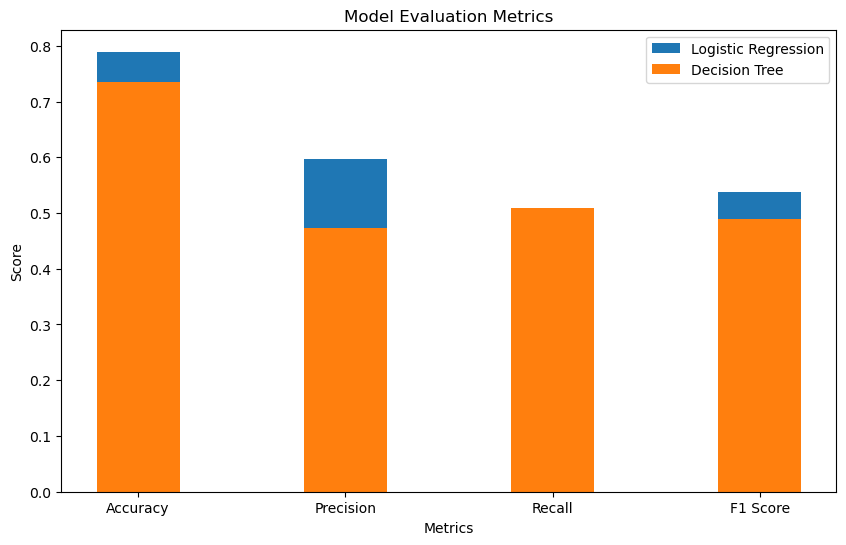

In [51]:
# Define evaluation metrics and their scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_lr = [accuracy, precision, recall, f1]
values_dt = [accuracy_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metrics, values_lr, width=0.4, label='Logistic Regression')
plt.bar(metrics, values_dt, width=0.4, label='Decision Tree')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.legend()
plt.show()

#### TASK 6: STREAMLIT DEPLOYMENT

#### Saving the model

In [52]:
# Save the model to disk
filename = 'logistic_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(logreg_model, file)

In [53]:
# Load your trained logistic regression model
model = pickle.load(open('logistic_model.pkl', 'rb'))

In [54]:
# Opening the model
with open('logistic_model.pkl', 'rb') as handle:
    label_encoders = pickle.load(handle)

In [55]:
# Function to encode the inputs using the same label encoders used in training
def encode_inputs(input_data):
    label_encoders = {}
    categorical_columns = input_data.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        le = LabelEncoder()
        input_df[column] = le.fit_transform(input_df[column])
        label_encoders[column] = le
    return input_data

In [56]:
# Streamlit user interface
def user_input_features():
    # Assuming you have these fields; you may add as many as your model needs
    gender = st.selectbox('Gender', ('Male', 'Female'))
    SeniorCitizen = st.selectbox('Senior Citizen', (0, 1))
    Partner = st.selectbox('Partner', ('Yes', 'No'))
    Dependents = st.selectbox('Dependents', ('Yes', 'No'))
    tenure = st.slider('Tenure', 0, 72, 1)  # Example for numerical input
    MonthlyCharges = st.slider('Monthly Charges', 0, 200, 1)
    TotalCharges = st.slider('Total Charges', 0, 8000, 1)
    data = {'gender': [gender],
            'SeniorCitizen': [SeniorCitizen],
            'Partner': [Partner],
            'Dependents': [Dependents],
            'tenure': [tenure],
            'MonthlyCharges': [MonthlyCharges],
            'TotalCharges': [TotalCharges]}
    features = pd.DataFrame(data)
    return features

st.write("""
# Simple Customer Churn Prediction App
This app predicts the probability of a telecom customer churning.
""")

input_df = user_input_features()

2024-04-29 10:20:31.517 
  command:

    streamlit run C:\Users\USER\anaconda3\envs\ArtI\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [57]:
# Encode the input variables
encoded_input_df = encode_inputs(input_df)

In [58]:
# Display user input features
st.subheader('User Input features')
st.write(encoded_input_df)

In [59]:
# Predict and display the output
if st.button('Predict'):
    prediction = model.predict(encoded_input_df)
    prediction_proba = model.predict_proba(encoded_input_df)
    st.subheader('Prediction')
    st.write('Churn' if prediction[0] == 1 else 'No churn')
    st.subheader('Prediction Probability')
    st.write(prediction_proba)

In [60]:
#streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)